# 04. Stock LSTM Prediction Model

### apply RNN: Many-to-One
- 7일 데이터를 가지고 8일차의 종가 데이터를 예측하는 모델 만들기
- 일별 수집된 데이터 >> 시간의 순서가 중요함

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [37]:
def MinMaxScaler(data):
    numerator = data - np.min(data, axis=0)  # 분자
    denominator = np.max(data, axis=0) - np.min(data, axis=0)  # 분모
    
    return numerator / (denominator + 1e-7)  # 분모가 0이 되지 않도록 아주 작은 값 더함 

In [38]:
# 데이터 가져오기
data = np.loadtxt("./data/data-02-stock_daily.csv", delimiter=',')
data[:3]

array([[8.28659973e+02, 8.33450012e+02, 8.28349976e+02, 1.24770000e+06,
        8.31659973e+02],
       [8.23020020e+02, 8.28070007e+02, 8.21655029e+02, 1.59780000e+06,
        8.28070007e+02],
       [8.19929993e+02, 8.24400024e+02, 8.18979980e+02, 1.28170000e+06,
        8.24159973e+02]])

In [39]:
# 날짜 순으로 만들기 위해 데이터를 뒤집어줌 (과거 >> 현재 순으로거 >> 현재 순으로)
data = data[:, ::-1]
data[:3]

array([[8.31659973e+02, 1.24770000e+06, 8.28349976e+02, 8.33450012e+02,
        8.28659973e+02],
       [8.28070007e+02, 1.59780000e+06, 8.21655029e+02, 8.28070007e+02,
        8.23020020e+02],
       [8.24159973e+02, 1.28170000e+06, 8.18979980e+02, 8.24400024e+02,
        8.19929993e+02]])

In [40]:
timesteps = seq_length = 7
input_features = 5   # feature 수
output_dim = 1       # 최종 예측 데이터의 수 (종가 데이터)

In [41]:
# 훈련/테스트 데이터 분리
train_size = int(len(data) * 0.8)

train_set = data[0:train_size]
# 7일치씩 테스트를 하기 위해 7개를 train_set과 중복되도록 함
# test_set의 마지막 데이터는 7개를 채울 수 없으므로 중복되더라도 train_set에서 가져와서 7개를 채우고자 함
test_set = data[train_size-seq_length:]

In [42]:
print(train_size, train_set.shape, test_set.shape)

585 (585, 5) (154, 5)


In [43]:
# 정규화
train_set = MinMaxScaler(train_set)
test_set = MinMaxScaler(test_set)

In [44]:
def build_dataset(time_series, seq_length):
    # 훈련데이터
    dataX = []
    # 정답데이터
    dataY = []
    
    # 데이터를 7개씩 가져오는 반복문
    for i in range(len(time_series) - seq_length):
        x = time_series[i:i+seq_length, :]  # 7일간의 입력 데이터
        y = time_series[i+seq_length, [-1]]    # 8일차
        
        print(x, '>>', y)
        dataX.append(x)
        dataY.append(y)
        
    return np.array(dataX), np.array(dataY)

In [45]:
# 훈련 데이터와 테스트 데이터를 함수에 적용
trainX, trainY = build_dataset(train_set, 7)  # 데이터를 7일씩 학습에 사용

[[0.98831302 0.06773081 1.         0.97543152 0.97333581]
 [0.97785024 0.10064206 0.9803545  0.95988111 0.95690035]
 [0.96645463 0.07092699 0.97250489 0.94927335 0.94789567]
 [0.9513578  0.0730233  0.97100833 0.94522671 0.9462346 ]
 [0.95564213 0.04948438 0.96376051 0.94522671 0.94518557]
 [0.95211558 0.06306814 0.96226394 0.93932734 0.93644323]
 [0.93588207 0.05658178 0.94550876 0.92282604 0.92391259]] >> [0.91753068]
[[0.97785024 0.10064206 0.9803545  0.95988111 0.95690035]
 [0.96645463 0.07092699 0.97250489 0.94927335 0.94789567]
 [0.9513578  0.0730233  0.97100833 0.94522671 0.9462346 ]
 [0.95564213 0.04948438 0.96376051 0.94522671 0.94518557]
 [0.95211558 0.06306814 0.96226394 0.93932734 0.93644323]
 [0.93588207 0.05658178 0.94550876 0.92282604 0.92391259]
 [0.92390372 0.04347744 0.93013248 0.90955899 0.91753068]] >> [0.91021623]
[[0.96645463 0.07092699 0.97250489 0.94927335 0.94789567]
 [0.9513578  0.0730233  0.97100833 0.94522671 0.9462346 ]
 [0.95564213 0.04948438 0.96376051 0.9

In [46]:
testX, testY = build_dataset(test_set, 7)

[[0.52554585 0.2020554  0.56220742 0.46761222 0.51393009]
 [0.57036699 0.29803282 0.57915245 0.48655693 0.55599234]
 [0.4685325  0.21284698 0.45384585 0.40975605 0.44236843]
 [0.45715257 0.25914491 0.49253047 0.42552434 0.45384002]
 [0.45215942 0.1856916  0.4327756  0.36642121 0.37736301]
 [0.3577564  0.17310633 0.38160547 0.31457769 0.31213827]
 [0.34626063 0.28893202 0.3677813  0.31990924 0.39222137]] >> [0.33715697]
[[0.57036699 0.29803282 0.57915245 0.48655693 0.55599234]
 [0.4685325  0.21284698 0.45384585 0.40975605 0.44236843]
 [0.45715257 0.25914491 0.49253047 0.42552434 0.45384002]
 [0.45215942 0.1856916  0.4327756  0.36642121 0.37736301]
 [0.3577564  0.17310633 0.38160547 0.31457769 0.31213827]
 [0.34626063 0.28893202 0.3677813  0.31990924 0.39222137]
 [0.39503023 0.34416902 0.36845064 0.34645517 0.33715697]] >> [0.2341307]
[[0.4685325  0.21284698 0.45384585 0.40975605 0.44236843]
 [0.45715257 0.25914491 0.49253047 0.42552434 0.45384002]
 [0.45215942 0.1856916  0.4327756  0.36

<br><hr>

### 신경망 모델 구현

In [47]:
# 모델 생성
model = tf.keras.Sequential()

In [48]:
# LSTM 신경망 만들기 
# 자연어 처리 뿐만 아니라 순서를 가진 순차적 데이터인 경우에도 사용 가능
model.add(tf.keras.layers.LSTM(units=1,
                               input_shape=(timesteps, input_features)))    # 입력 데이터에 대한 shape 

In [49]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1)                 28        
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


In [50]:
# 모델학습
model.compile(loss='mse',        # 연속형 변수의 손실함수
              optimizer='adam')  # default learning_rate= 0.01
# 연속형 종속변수이므로 혼동행렬로 정확도를 구할 수 없음

In [51]:
# 모델 저장
model.fit(trainX,
          trainY,
          epochs=100)

Epoch 1/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0495
Epoch 2/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0334
Epoch 3/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0245
Epoch 4/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0194
Epoch 5/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0162
Epoch 6/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0140
Epoch 7/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 8/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0108
Epoch 9/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0096
Epoch 10/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0086
Epoch 11/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0078
Epoch 12/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0072
Epoch 13/100
19/19 [=================

In [56]:
test_pred = model.predict(testX)
print(testX.shape, test_pred.shape)

(147, 7, 5) (147, 1)


### 테스트 데이터 예측값과 정답 데이터 비교 시각화

In [55]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

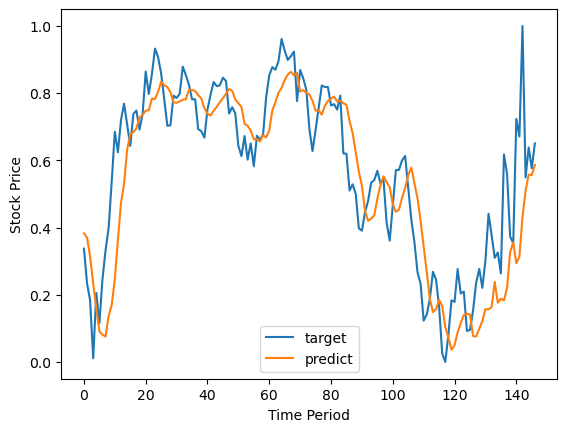

In [57]:
plt.plot(testY)
plt.plot(test_pred)
plt.xlabel('Time Period')
plt.ylabel('Stock Price')
plt.legend(['target', 'predict'])

plt.show()